In [1]:
from keras import models
from keras import layers
from keras.applications import VGG16
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda
import tensorflow as tf

DATASET_PATH = './ALL X Ray/train'
test_dir = './ALL X Ray/test'

IMAGE_SIZE = (150, 150)
NUM_CLASSES = 3
BATCH_SIZE = 10 
NUM_EPOCHS = 20
LEARNING_RATE =0.0005 

Using TensorFlow backend.


In [2]:
from keras.preprocessing.image import ImageDataGenerator

#Train datagen here is a preprocessor
train_datagen = ImageDataGenerator(rescale=1./255,
 rotation_range=50,
 featurewise_center = True,
 featurewise_std_normalization = True,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.25,
 zoom_range=0.1,
 zca_whitening = True,
 channel_shift_range = 20,
 horizontal_flip = True ,
 vertical_flip = True ,
 validation_split = 0.2,
 fill_mode="constant")


train_batches = train_datagen.flow_from_directory(DATASET_PATH,
 target_size=IMAGE_SIZE,
 shuffle=True,
 batch_size=BATCH_SIZE,
 subset = "training",
 seed=42,
 class_mode="categorical",
 
 )


valid_batches = train_datagen.flow_from_directory(DATASET_PATH,
 target_size=IMAGE_SIZE,
 shuffle=True,
 batch_size=BATCH_SIZE,
 subset = "validation",
 seed=42,
 class_mode="categorical",
 
 
 )

C:\Users\ASUS\Anaconda3\envs\tensorflow\lib\site-packages\keras_preprocessing\image\image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 474 images belonging to 3 classes.
Found 117 images belonging to 3 classes.


In [3]:
conv_base = VGG16(weights='imagenet',
 include_top=False,
 input_shape=(150, 150, 3))
conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy',
 
optimizer=optimizers.Adam(lr=LEARNING_RATE),
metrics=['acc'])
model.save('CovidVG-16.model')

In [4]:
STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size


from keras.callbacks import CSVLogger

csv_VGG16 = CSVLogger('trainingVGG16.log', separator=',', append=False)

result=model.fit_generator(train_batches,
 steps_per_epoch =STEP_SIZE_TRAIN,
 validation_data = valid_batches,
 validation_steps = STEP_SIZE_VALID,
 epochs= NUM_EPOCHS,
 callbacks=[csv_VGG16]
 )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20


C:\Users\ASUS\Anaconda3\envs\tensorflow\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\ASUS\Anaconda3\envs\tensorflow\lib\site-packages\keras_preprocessing\image\image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


47/47 [==============================] - 134s 3s/step - loss: 0.9312 - acc: 0.5340 - val_loss: 0.7536 - val_acc: 0.6000
Epoch 2/20
47/47 [==============================] - 277s 6s/step - loss: 0.6700 - acc: 0.7086 - val_loss: 0.5847 - val_acc: 0.7477
Epoch 3/20
47/47 [==============================] - 410s 9s/step - loss: 0.4916 - acc: 0.7989 - val_loss: 0.3928 - val_acc: 0.8505
Epoch 4/20
47/47 [==============================] - 444s 9s/step - loss: 0.4557 - acc: 0.8085 - val_loss: 0.5289 - val_acc: 0.8131
Epoch 5/20
47/47 [==============================] - 422s 9s/step - loss: 0.3804 - acc: 0.8564 - val_loss: 0.3038 - val_acc: 0.8598
Epoch 6/20
47/47 [==============================] - 352s 7s/step - loss: 0.3468 - acc: 0.8659 - val_loss: 0.3209 - val_acc: 0.8598
Epoch 7/20
47/47 [==============================] - 291s 6s/step - loss: 0.3085 - acc: 0.8893 - val_loss: 0.3219 - val_acc: 0.8785
Epoch 8/20
47/47 [==============================] - 276s 6s/step - loss: 0.3106 - acc: 0.8915 

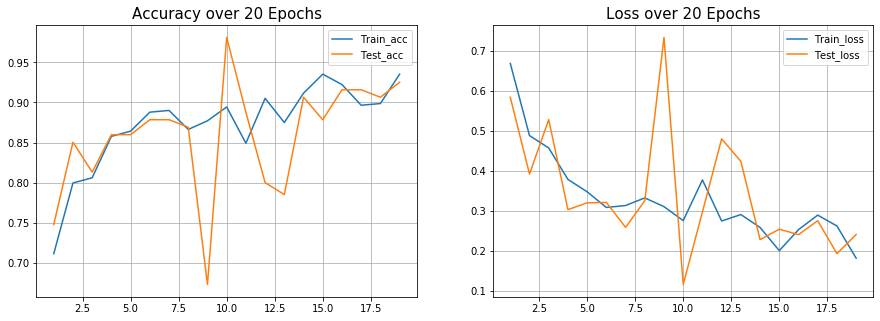

In [5]:
import matplotlib.pyplot as plt
import numpy as np


acc = np.array(result.history['acc'])
loss = np.array(result.history['loss'])
val_acc = np.array(result.history['val_acc'])
val_loss = np.array(result.history['val_loss'])
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(range(1,NUM_EPOCHS), acc[1:], label='Train_acc')
plt.plot(range(1,NUM_EPOCHS), val_acc[1:], label='Test_acc')
plt.title('Accuracy over '  + str(NUM_EPOCHS) + ' Epochs', size=15)
plt.legend()
plt.grid(True)
plt.subplot(122)
plt.plot(range(1,NUM_EPOCHS), loss[1:], label='Train_loss')
plt.plot(range(1,NUM_EPOCHS), val_loss[1:], label='Test_loss')
plt.title('Loss over ' + str(NUM_EPOCHS) + ' Epochs', size=15)
plt.legend()
plt.grid(True)
plt.show()

In [6]:
import cv2

def prepare(filepath):
    IMG_SIZE = 150
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1,IMG_SIZE, IMG_SIZE,3)
    

model = tf.keras.models.load_model("CovidVG-16.model")

prediction = model.predict_classes([prepare('p.jpeg')])

fin = int(prediction)
fin

#Prediction 0 means covid

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


1